In [1]:
import json
file = open('frames.json','r')
contents = file.read()
data = json.loads(contents)

In [20]:
wizard = []
user = []
import re
for d in data:
    turns = d['turns']
    for each in turns:
        keys = each.keys()
        if 'db' in keys:
            wizard += re.findall("[A-Za-z']+", each['text'].lower().replace('-',''))
        else:
            user += re.findall("[A-Za-z']+", each['text'].lower().replace('-',''))

In [21]:
from collections import Counter
countWizard = Counter(wizard)
countUser = Counter(user)

In [39]:
def findout_top_words(original_data, count):
    top= {}
    for key in original_data.keys():
        if original_data[key] > count:
            top[key] = original_data[key]
    return top


In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [54]:
top_wizard = findout_top_words(countWizard,1000)
sorted_top_wizard = dict(sorted(top_wizard.items(), key=lambda t: t[1]))

In [67]:
top_user = findout_top_words(countUser,500)
sorted_top_user = dict(sorted(top_user.items(), key=lambda t: t[1]))

In [73]:
def display_freq_bar(data):
    # set subplots
    fig, ax = plt.subplots()
    # set figure size 
    fig.set_size_inches(20,10)
    # prepare data
    y_pos = np.arange(len(data.keys()))
    x_data = data.values()
    # set chart type
    ax.barh(y_pos, x_data)
    # set y ticks and labels
    ax.set_yticks(y_pos)
    ax.set_yticklabels(data.keys());

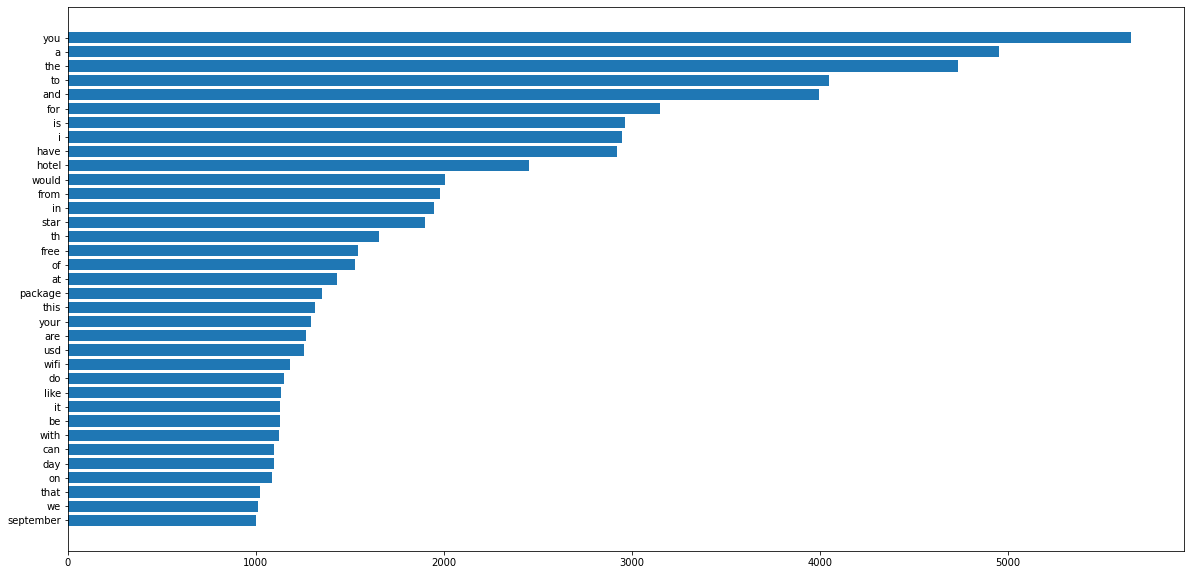

In [74]:
display_freq_bar(sorted_top_wizard)

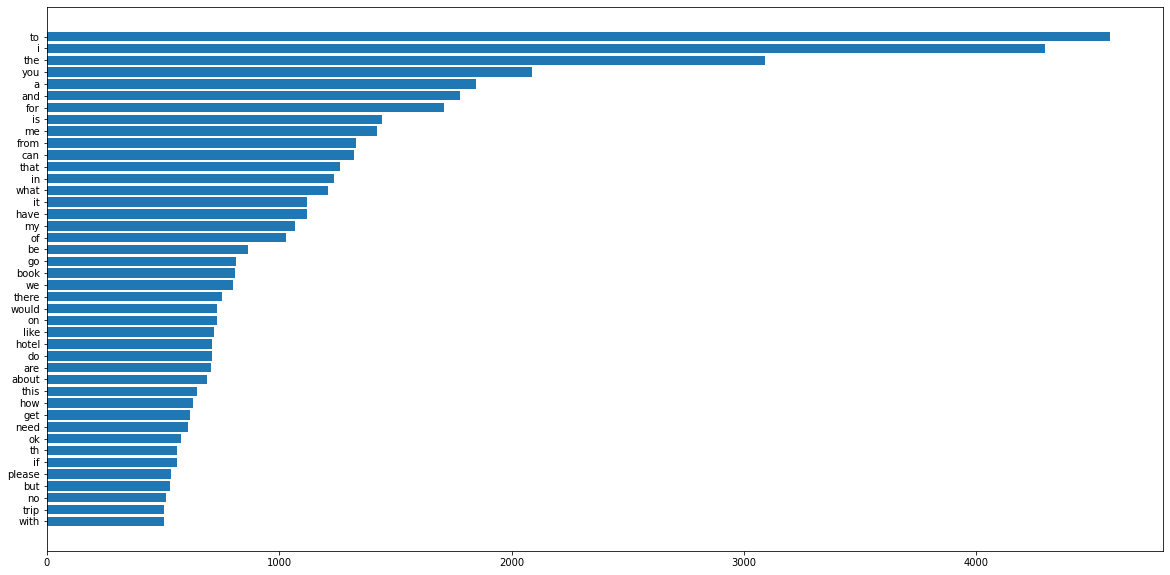

In [75]:
display_freq_bar(sorted_top_user)